In [2]:
import matplotlib.pyplot as plt
from retinaface import RetinaFace
from facenet_pytorch import InceptionResnetV1, MTCNN
from PIL import Image
import torchvision.transforms as transforms
from torchvision.transforms import functional as _F
import torch.nn.functional as F
import numpy as np
import cv2
import torch

In [3]:
transform = transforms.Compose([transforms.PILToTensor()])

In [4]:
def imresample(img, sz):
    im_data = F.interpolate(img, size=sz, mode="area")
    return im_data

In [5]:
def crop_resize(img, box, image_size):
    x = box[0]
    y = box[1]
    w = box[2] - x
    h = box[3] - y
    if isinstance(img, np.ndarray):
        img = img[y : y + h, x : x + w]
        out = cv2.resize(img, (image_size, image_size), interpolation=cv2.INTER_AREA).copy()
    elif isinstance(img, torch.Tensor):
        img = img[y : y + h, x : x + w]
        out = (
            imresample(img.permute(2, 0, 1).unsqueeze(0).float(), (image_size, image_size))
            .byte()
            .squeeze(0)
            .permute(1, 2, 0)
        )
    else:
        out = img.crop(box).copy().resize((image_size, image_size), Image.BILINEAR)
    return out

In [6]:
img1 = Image.open("./datasets/people/14D577CD-1766-43A7-AF1D-1F8930059436_1_105_c.jpeg")
img2 = Image.open("./datasets/people/028C2197-6F21-4DBB-A868-AC93EE45A1F9_4_5005_c.jpeg")

In [7]:
faces1 = RetinaFace.detect_faces(
    np.array(img1),
)
faces2 = RetinaFace.detect_faces(
    np.array(img2),
)

In [16]:
faces1

{'face_1': {'score': 0.9992145299911499,
  'facial_area': [645, 128, 868, 476],
  'landmarks': {'right_eye': [804.0456, 248.98785],
   'left_eye': [835.45404, 251.87283],
   'nose': [877.28357, 304.92007],
   'mouth_right': [816.2614, 385.8776],
   'mouth_left': [839.0655, 389.3869]}}}

In [424]:
# facial_area = faces1['face_1']["facial_area"]

# x = facial_area[0]
# y = facial_area[1]
# w = facial_area[2] - x
# h = facial_area[3] - y

# facial_img = img1[y : y + h, x : x + w]

In [20]:
for key, value in faces1.items():
    print(key, value['facial_area'])

face_1 [645, 128, 868, 476]


In [8]:
face1 = crop_resize(img1, faces1['face_1']['facial_area'], 160)
face2 = crop_resize(img2, faces2['face_1']['facial_area'], 160)

In [9]:
f1 = _F.to_tensor(np.float32(face1))
f2 = _F.to_tensor(np.float32(face2))

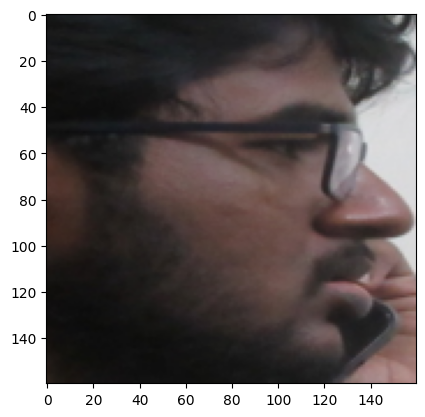

In [28]:
# display face1 using f1 tensor
plt.imshow(f1.int().permute(1, 2, 0))

In [11]:
model = InceptionResnetV1(pretrained="vggface2").eval()

face1_embedding = model(f1.unsqueeze(0))
face2_embedding = model(f2.unsqueeze(0))

In [25]:
# cosine similarity
cosine_similarity = F.cosine_similarity(face1_embedding, face2_embedding).item()
cosine_similarity

0.9365600943565369

In [377]:
# def fixed_image_standardization(image_tensor):
#     processed_tensor = (image_tensor - 127.5) / 128.0
#     return processed_tensor

In [235]:
# faces['face_1']['facial_area']

# img = Image.open("./datasets/people/D35D0AF4-FDAA-4520-8848-6AEEACCEF653_1_105_c.jpeg")

# # crop face from image using facial area
# face = img.crop(faces['face_1']['facial_area'])

# plt.imshow(face)

In [236]:
# mtcnn = MTCNN(keep_all=True, thresholds=[0.75, 0.8, 0.8], post_process=True)

# img1 = Image.open("./datasets/people/14D577CD-1766-43A7-AF1D-1F8930059436_1_105_c.jpeg")
# img2 = Image.open("./datasets/people/028C2197-6F21-4DBB-A868-AC93EE45A1F9_4_5005_c.jpeg")

# face1, prob1 = mtcnn(img1, return_prob=True)
# face2, prob2 = mtcnn(img2, return_prob=True)

In [237]:
# face1 = face1[0]
# face2 = face2[0]

In [238]:
# # convert tensor to type float32
# img_tensor1 = img_tensor1.float()